In [1]:
# 19/03/21
# 0|1
%matplotlib inline
import matplotlib.pyplot as plt
from random import uniform
import math
pi = math.pi

In [2]:
# Helper functions for all problems

# Find Euclidian distance between vector w and (x, y)
def get_distance(w, x, y):
    dist_square = (w[0] - x)*(w[0] - x) + (w[1] - y)*(w[1] - y)
    return math.sqrt(dist_square)

# Find the closest wector w for point located at (x, y)
def closest_weight(W, x, y):
    dist = 1000
    w_min = [0,0]
    for w in W:
        if (get_distance(w,x,y) < dist):
            w_min = w
            dist = get_distance(w,x,y)
    return w_min

# Calculate loss function
def Loss(W, x, y):
    E = 0
    for j in range(len(x)):
        w_closest = closest_weight(W, x[j], y[j])
        E += 0.5*get_distance(w_closest, x[j], y[j])*get_distance(w_closest, x[j], y[j])
    return E


In [3]:
# For problem part B 

def three_clusters(epoch_num):
    
    # make all data together
    x = x_1 + x_2 + x_3
    y = y_1 + y_2 + y_3
    
    # initialize weights randomly in some range 
    w_1 = [uniform(-2, 4), uniform(-2,4)]
    w_2 = [uniform(-2, 4), uniform(-2,4)]
    w_3 = [uniform(-2, 4), uniform(-2,4)]
    
    # store them in one list
    W = [w_1, w_2, w_3]
    
    # parameter and storage arrays
    etha = 0.1
    error = []
    epoch = []
    
    # make the leaning in epoch_num iterations
    for i in range(epoch_num):
        # for each point find closest weight and update it
        for j in range(len(x)):
                w_min = closest_weight(W, x[j], y[j])

                if (w_min == W[0]):
                    W[0][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[0][1] = w_min[1] + etha * (y[j] - w_min[1])      
                elif (w_min == W[1]):
                    W[1][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[1][1] = w_min[1] + etha * (y[j] - w_min[1])      
                else:
                    W[2][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[2][1] = w_min[1] + etha * (y[j] - w_min[1])
        
        # change learning rate parameter every 50 iterations
        if (i%50==0):
            etha = etha/2
        
        # calculate and store loss every 10 iterations
        if (i%10==0):
            error.append(Loss(W, x, y))
            epoch.append(i)
            
    plot1 = plt.figure(1)
    # plot weight to show cluster centers
    for w in W:                
        plt.scatter(w[0], w[1], marker='x', color = 'black')

    # plot clusters with corresponding colors for each
    for i in range(len(x)):
        w_min = closest_weight(W, x[i], y[i])

        if (w_min == W[0]):
            plt.scatter(x[i], y[i], color ='red')
        elif (w_min == W[1]):
            plt.scatter(x[i], y[i], color ='green')
        else:
            plt.scatter(x[i], y[i], color ='blue')
            
    plot2 = plt.figure(2)
    plt.plot(epoch, error)
    plt.show()

In [4]:
# For problem part C 

def two_clusters(epoch_num):
    
    x = x_1 + x_2 + x_3
    y = y_1 + y_2 + y_3
    
    w_1 = [uniform(-2, 4), uniform(-2,4)]
    w_2 = [uniform(-2, 4), uniform(-2,4)]

    W = [w_1, w_2]

    etha = 0.1
    #delta_etha = 0.05
    error = []
    epoch = []

    for i in range(epoch_num):
        for j in range(len(x)):
                w_min = closest_weight(W, x[j], y[j])

                if (w_min == W[0]):
                    W[0][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[0][1] = w_min[1] + etha * (y[j] - w_min[1])  
                else:
                    W[1][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[1][1] = w_min[1] + etha * (y[j] - w_min[1])

        if (i%50==0):
            etha = etha/2

        if (i%10==0):
            error.append(Loss(W, x, y))
            epoch.append(i)
            
    plot1 = plt.figure(1)
    
    for w in W:                
        plt.scatter(w[0], w[1], marker='x', color = 'black')
    plt.scatter(x, y)

    for i in range(len(x)):

        w_min = closest_weight(W, x[i], y[i])

        if (w_min == W[0]):
            plt.scatter(x[i], y[i], color ='red')
        else:
            plt.scatter(x[i], y[i], color ='blue')
            
    plot2 = plt.figure(2)
    plt.plot(epoch, error)
    plt.show()

In [5]:
# For problem part D

def four_clusters(epoch_num):
    x = x_1 + x_2 + x_3
    y = y_1 + y_2 + y_3

    w_1 = [uniform(-2, 4), uniform(-2,4)]
    w_2 = [uniform(-2, 4), uniform(-2,4)]
    w_3 = [uniform(-2, 4), uniform(-2,4)]
    w_4 = [uniform(-2, 4), uniform(-2,4)]

    W = [w_1, w_2, w_3, w_4]

    etha = 0.1
    error = []
    epoch = []

    for i in range(epoch_num):
        for j in range(len(x)):
                w_min = closest_weight(W, x[j], y[j])

                if (w_min == W[0]):
                    W[0][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[0][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[1]):
                    W[1][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[1][1] = w_min[1] + etha * (y[j] - w_min[1])
                elif (w_min == W[0]):
                    W[2][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[2][1] = w_min[1] + etha * (y[j] - w_min[1])
                else:
                    W[3][0] = w_min[0] + etha * (x[j] - w_min[0]) 
                    W[3][1] = w_min[1] + etha * (y[j] - w_min[1])

        if (i%50==0):
            etha = etha/2

        if (i%10==0):
            error.append(Loss(W, x, y))
            epoch.append(i)
    
    plot1 = plt.figure(1)
    
    for w in W:                
        plt.scatter(w[0], w[1], marker='x', color = 'black')

    for i in range(len(x)):
        w_min = closest_weight(W, x[i], y[i])

        if (w_min == W[0]):
            plt.scatter(x[i], y[i], color ='red')
        elif (w_min == W[1]):
            plt.scatter(x[i], y[i], color ='green')
        elif (w_min == W[2]):
            plt.scatter(x[i], y[i], color ='pink')
        else:
            plt.scatter(x[i], y[i], color ='blue')
            
    plot2 = plt.figure(2)
    plt.plot(epoch, error)
    plt.show()

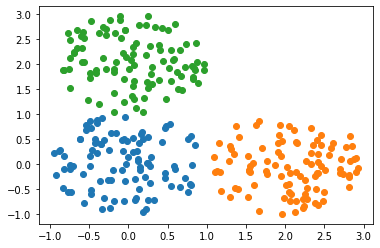

In [4]:
# Problem 1 (a)

N_1 = 0
N_2 = 0
N_3 = 0

x_1 = []
y_1 = []

x_2 = []
y_2 = []

x_3 = []
y_3 = []

while (N_1 < 100):
    x = uniform(-1,1)
    y = uniform(-1,1)
    if (y*y + x*x < 1):
        x_1.append(x)
        y_1.append(y)
        N_1+=1

while (N_2 < 100):
    x = uniform(1,3)
    y = uniform(-1,1)
    if (y*y + (x-2)*(x-2) < 1):
        x_2.append(x)
        y_2.append(y)
        N_2+=1
        
while (N_3 < 100):
    x = uniform(-1,1)
    y = uniform(1,3)
    if ((y-2)*(y-2) + x*x < 1):
        x_3.append(x)
        y_3.append(y)
        N_3+=1
        
# different colors to refer to different clusters        
plt.scatter(x_1, y_1)      
plt.scatter(x_2, y_2)
plt.scatter(x_3, y_3)

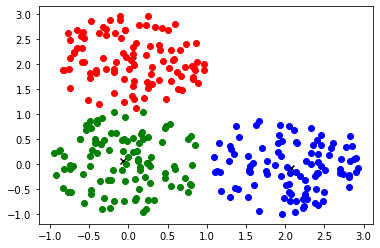

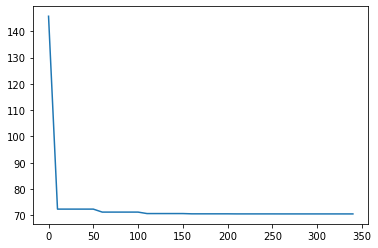

In [5]:
# Problem 1 (b)
three_clusters(350)

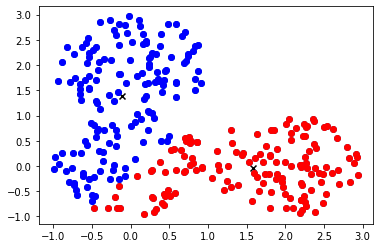

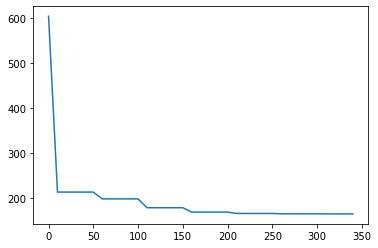

In [234]:
# Problem 1 (c)
two_clusters(350)

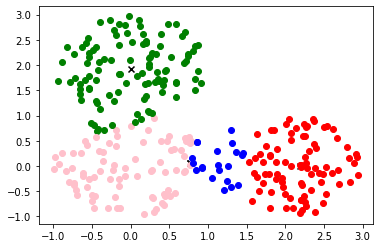

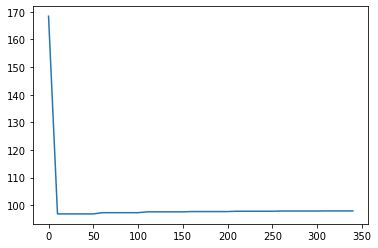

In [244]:
# Problem 1 (d)
four_clusters(350)

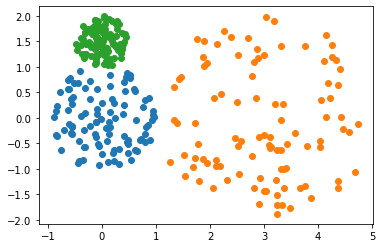

In [245]:
# Problem 2 (a)

N_1 = 0
N_2 = 0
N_3 = 0

x_1 = []
y_1 = []

x_2 = []
y_2 = []

x_3 = []
y_3 = []

while (N_1 < 100):
    x = uniform(-1,1)
    y = uniform(-1,1)
    if (y*y + x*x < 1):
        x_1.append(x)
        y_1.append(y)
        N_1+=1

while (N_2 < 100):
    x = uniform(1,5)
    y = uniform(-2,2)
    if (y*y + (x-3)*(x-3) < 4):
        x_2.append(x)
        y_2.append(y)
        N_2+=1
        
while (N_3 < 100):
    x = uniform(-0.5,0.5)
    y = uniform(1,2)
    if ((y-1.5)*(y-1.5) + x*x < 0.25):
        x_3.append(x)
        y_3.append(y)
        N_3+=1
        
# different colors to refer to different clusters        
plt.scatter(x_1, y_1)      
plt.scatter(x_2, y_2)
plt.scatter(x_3, y_3)

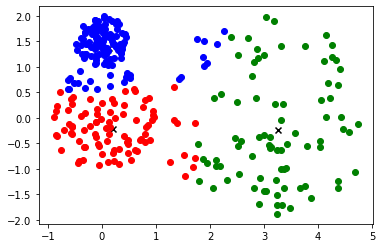

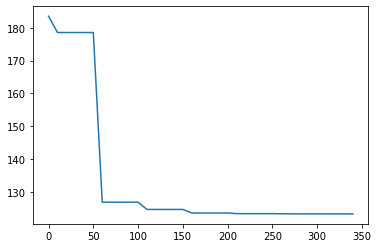

In [246]:
# Problem 2 (b)
three_clusters(350)

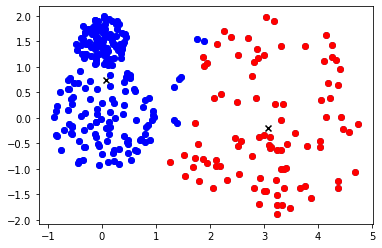

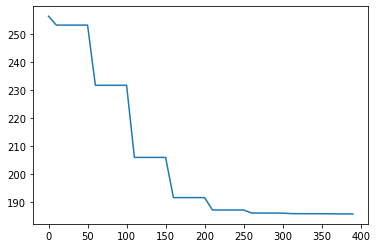

In [247]:
# Problem 2 (c)
two_clusters(400)

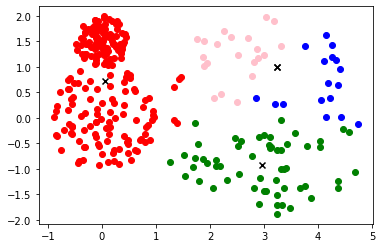

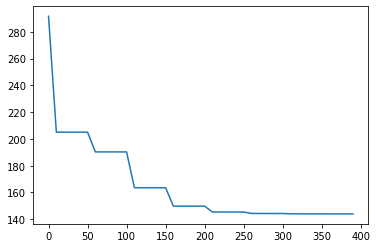

In [251]:
# Problem 2 (d)
four_clusters(400)

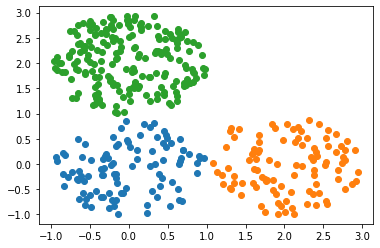

In [252]:
# Problem 3 (a)

N_1 = 0
N_2 = 0
N_3 = 0

x_1 = []
y_1 = []

x_2 = []
y_2 = []

x_3 = []
y_3 = []

while (N_1 < 100):
    x = uniform(-1,1)
    y = uniform(-1,1)
    if (y*y + x*x < 1):
        x_1.append(x)
        y_1.append(y)
        N_1+=1

while (N_2 < 100):
    x = uniform(1,3)
    y = uniform(-1,1)
    if (y*y + (x-2)*(x-2) < 1):
        x_2.append(x)
        y_2.append(y)
        N_2+=1
        
while (N_3 < 200):
    x = uniform(-1,1)
    y = uniform(1,3)
    if ((y-2)*(y-2) + x*x < 1):
        x_3.append(x)
        y_3.append(y)
        N_3+=1
# different colors to refer to different clusters        
plt.scatter(x_1, y_1)      
plt.scatter(x_2, y_2)
plt.scatter(x_3, y_3)

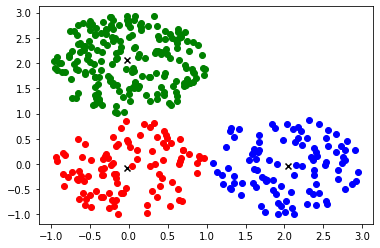

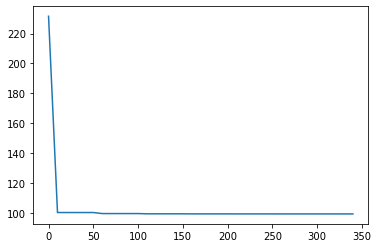

In [253]:
# Problem 3 (b)
three_clusters(350)

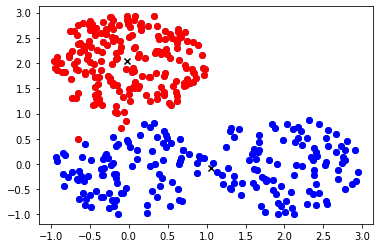

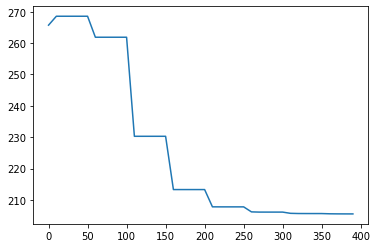

In [254]:
# Problem 3(c)
two_clusters(400)

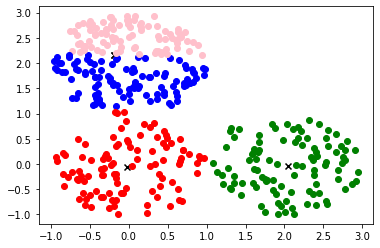

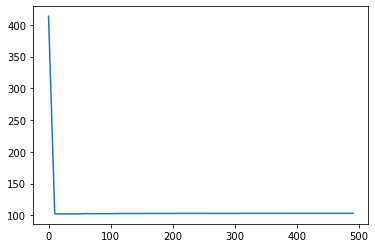

In [256]:
# Problem 3 (d)
four_clusters(500)

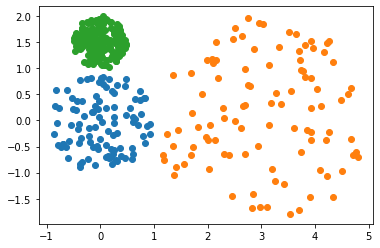

In [6]:
# Problem 4 (a)

N_1 = 0
N_2 = 0
N_3 = 0

x_1 = []
y_1 = []

x_2 = []
y_2 = []

x_3 = []
y_3 = []

while (N_1 < 100):
    x = uniform(-1,1)
    y = uniform(-1,1)
    if (y*y + x*x < 1):
        x_1.append(x)
        y_1.append(y)
        N_1+=1

while (N_2 < 100):
    x = uniform(1,5)
    y = uniform(-2,2)
    if (y*y + (x-3)*(x-3) < 4):
        x_2.append(x)
        y_2.append(y)
        N_2+=1
        
while (N_3 < 200):
    x = uniform(-0.5,0.5)
    y = uniform(1,2)
    if ((y-1.5)*(y-1.5) + x*x < 0.25):
        x_3.append(x)
        y_3.append(y)
        N_3+=1
        
# different colors to refer to different clusters        
plt.scatter(x_1, y_1)      
plt.scatter(x_2, y_2)
plt.scatter(x_3, y_3)

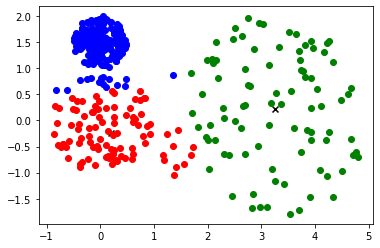

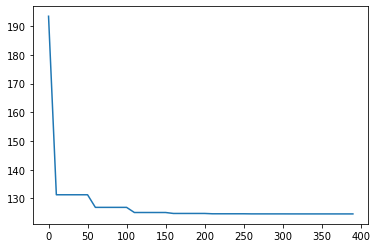

In [7]:
# Problem 4 (b)
three_clusters(400)

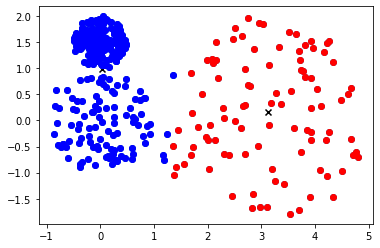

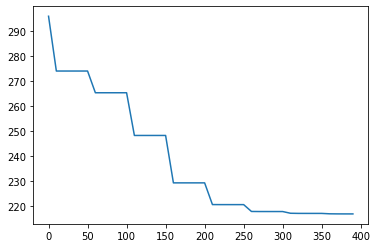

In [8]:
# Problem 4 (c)
two_clusters(400)

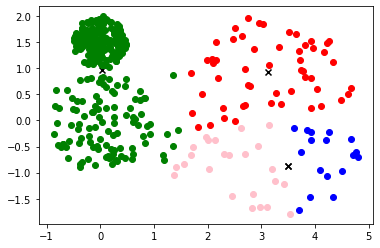

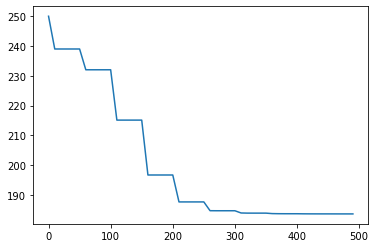

In [16]:
# Problem 4 (d)
four_clusters(500)